In [ ]:
!pip install tensorflow

In [ ]:
# Install nightly package for some functionalities that aren't in alpha
!pip install tensorflow-gpu==2.0.0-beta1

# Install TF Hub for TF2
!pip install 'tensorflow-hub == 0.5'

     |████████████████████████████████| 348.9MB 51kB/s 
     |████████████████████████████████| 501kB 9.8MB/s 
     |████████████████████████████████| 3.1MB 43.8MB/s 
     |████████████████████████████████| 81kB 2.9MB/s 
  Found existing installation: tensorflow-hub 0.7.0
    Uninstalling tensorflow-hub-0.7.0:
      Successfully uninstalled tensorflow-hub-0.7.0


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()

import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras import optimizers
from keras import regularizers

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
!pip install -q keras

In [ ]:
import keras

In [ ]:
data_path = '/content/drive/My Drive/Colab Notebooks/Citrus_mobilenet'
train_path = '/content/drive/My Drive/Colab Notebooks/Citrus_mobilenet/test'
validation_path = '/content/drive/My Drive/Colab Notebooks/Citrus_mobilenet/validation'

In [ ]:
import json

with open('/content/drive/My Drive/Colab Notebooks/Citrus_mobilenet/category.json', 'r') as f:
    cat_to_name = json.load(f)
    classes = list(cat_to_name.values())
    
print (classes)
print('Number of classes:',len(classes))

['ctv', 'healthy', 'hwb']
Number of classes: 3


In [ ]:
IMAGE_SHAPE = (224, 224)

BATCH_SIZE = 64 #@param {type:"integer"}

In [ ]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_path, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE)

do_data_augmentation = True #@param {type:"boolean"}
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,
      fill_mode='nearest' )
else:
  train_datagen = validation_datagen
  
train_generator = train_datagen.flow_from_directory(
    train_path, 
    subset="training", 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE)

Found 1152 images belonging to 3 classes.
Found 1787 images belonging to 3 classes.


**using only LR=0.001**

In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
   
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

In [ ]:

LEARNING_RATE = 0.001 #@param {type:"number"}

model.compile(
   optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['acc'])

In [ ]:
EPOCHS=10 #@param {type:"integer"}

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


27/27 [==============================] - 1851s 69s/step - loss: 0.5510 - acc: 0.6712 - val_loss: 0.4718 - val_acc: 0.8785
Epoch 2/10
27/27 [==============================] - 31s 1s/step - loss: 0.1547 - acc: 0.9421 - val_loss: 0.5164 - val_acc: 0.8689
Epoch 3/10
27/27 [==============================] - 30s 1s/step - loss: 0.1060 - acc: 0.9541 - val_loss: 0.4403 - val_acc: 0.9036
Epoch 4/10
27/27 [==============================] - 29s 1s/step - loss: 0.0826 - acc: 0.9716 - val_loss: 0.4490 - val_acc: 0.9010
Epoch 5/10
27/27 [==============================] - 29s 1s/step - loss: 0.0809 - acc: 0.9718 - val_loss: 0.6578 - val_acc: 0.8655
Epoch 6/10
27/27 [==============================] - 29s 1s/step - loss: 0.0741 - acc: 0.9737 - val_loss: 0.4751 - val_acc: 0.9010
Epoch 7/10
27/27 [==============================] - 29s 1s/step - loss: 0.0757 - acc: 0.9744 - val_loss: 0.4164 - val_acc: 0.9010
Epoch 8/10
27/27 [==============================] - 29s 1s/step - loss: 0.0890 - acc: 0.9743 - val

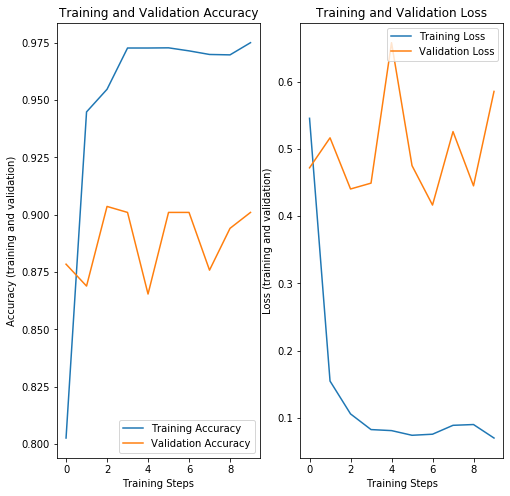

In [ ]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.savefig('/content/drive/My Drive/Colab Notebooks/Citrus_mobilenet/citrus_graph.png',dpi=400)
plt.show()

**using regularizer of l2(0.01) with LR=0.001**

In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
   
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(64, input_dim=64, kernel_regularizer = regularizers.l2(0.01)),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

In [ ]:
LEARNING_RATE = 0.001 #@param {type:"number"}

model.compile(
   optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['acc'])

In [ ]:
EPOCHS=10 #@param {type:"integer"}

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/10
27/27 [==============================] - 33s 1s/step - loss: 1.8502 - acc: 0.6444 - val_loss: 1.7050 - val_acc: 0.7986
Epoch 2/10
27/27 [==============================] - 30s 1s/step - loss: 1.0863 - acc: 0.9221 - val_loss: 1.2888 - val_acc: 0.8924
Epoch 3/10
27/27 [==============================] - 30s 1s/step - loss: 0.8992 - acc: 0.9572 - val_loss: 1.2326 - val_acc: 0.8802
Epoch 4/10
27/27 [==============================] - 29s 1s/step - loss: 0.7515 - acc: 0.9790 - val_loss: 1.1388 - val_acc: 0.8837
Epoch 5/10
27/27 [==============================] - 29s 1s/step - loss: 0.6792 - acc: 0.9677 - val_loss: 0.9180 - val_acc: 0.9106
Epoch 6/10
27/27 [==============================] - 29s 1s/step - loss: 0.5633 - acc: 0.9712 - val_loss: 0.8424 - val_acc: 0.9097
Epoch 7/10
27/27 [==============================] - 28s 1s/step - loss: 0.5053 - acc: 0.9726 - val_loss: 0.8674 - val_acc: 0.8993
Epoch 8/10
27/27 [==============================] - 28s 1s/step - loss: 0.4532 - acc: 0.96

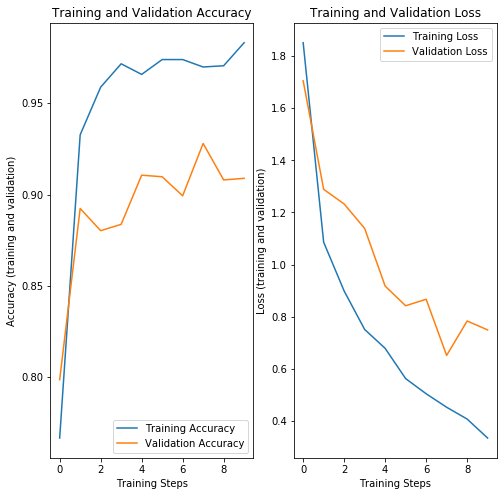

In [ ]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.savefig('/content/drive/My Drive/Colab Notebooks/Citrus_mobilenet/citrus_graph_1.png',dpi=400)
plt.show()

**using regularizer and LR=0.01**

In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
   
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(64, input_dim=64, kernel_regularizer = regularizers.l2(0.01)),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

In [ ]:
LEARNING_RATE = 0.01 #@param {type:"number"}

model.compile(
   optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['acc'])

In [ ]:
EPOCHS=10 #@param {type:"integer"}

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


27/27 [==============================] - 1067s 40s/step - loss: 11.3504 - acc: 0.3428 - val_loss: 11.1527 - val_acc: 0.3655
Epoch 2/10
27/27 [==============================] - 26s 949ms/step - loss: 11.3175 - acc: 0.3439 - val_loss: 10.7067 - val_acc: 0.3655
Epoch 3/10
27/27 [==============================] - 24s 898ms/step - loss: 11.1788 - acc: 0.3144 - val_loss: 10.4752 - val_acc: 0.3655
Epoch 4/10
27/27 [==============================] - 24s 893ms/step - loss: 10.9931 - acc: 0.3332 - val_loss: 10.3605 - val_acc: 0.3655
Epoch 5/10
27/27 [==============================] - 23s 870ms/step - loss: 10.5537 - acc: 0.3641 - val_loss: 10.3007 - val_acc: 0.3655
Epoch 6/10
27/27 [==============================] - 23s 866ms/step - loss: 10.8944 - acc: 0.3121 - val_loss: 10.2683 - val_acc: 0.3655
Epoch 7/10
27/27 [==============================] - 23s 866ms/step - loss: 10.7829 - acc: 0.3275 - val_loss: 10.2503 - val_acc: 0.3655
Epoch 8/10
27/27 [==============================] - 23s 865ms/step

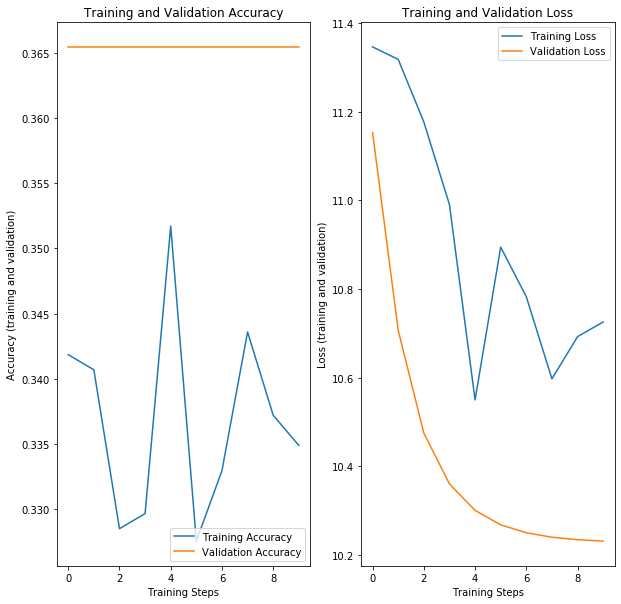

In [ ]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.savefig('/content/drive/My Drive/Colab Notebooks/Citrus_mobilenet/citrus_graph_2.png',dpi=400)
plt.show()

**usinf regularizer and LR=0.1**

In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
   
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(64, input_dim=64, kernel_regularizer = regularizers.l2(0.01)),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

In [ ]:
LEARNING_RATE = 0.1 #@param {type:"number"}

model.compile(
   optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['acc'])

In [ ]:
EPOCHS=10 #@param {type:"integer"}

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/10
27/27 [==============================] - 33s 1s/step - loss: 20.3655 - acc: 0.3433 - val_loss: 33.1680 - val_acc: 0.2830
Epoch 2/10
27/27 [==============================] - 30s 1s/step - loss: 35.1034 - acc: 0.3415 - val_loss: 33.3651 - val_acc: 0.2830
Epoch 3/10
27/27 [==============================] - 30s 1s/step - loss: 28.4429 - acc: 0.3280 - val_loss: 25.1278 - val_acc: 0.2830
Epoch 4/10
27/27 [==============================] - 29s 1s/step - loss: 21.6664 - acc: 0.3313 - val_loss: 19.8668 - val_acc: 0.2830
Epoch 5/10
27/27 [==============================] - 29s 1s/step - loss: 17.4045 - acc: 0.3429 - val_loss: 16.7084 - val_acc: 0.2830
Epoch 6/10
27/27 [==============================] - 29s 1s/step - loss: 15.0689 - acc: 0.3243 - val_loss: 14.7884 - val_acc: 0.2830
Epoch 7/10
27/27 [==============================] - 29s 1s/step - loss: 13.3768 - acc: 0.3376 - val_loss: 13.6065 - val_acc: 0.2830
Epoch 8/10
27/27 [==============================] - 29s 1s/step - loss: 12.4

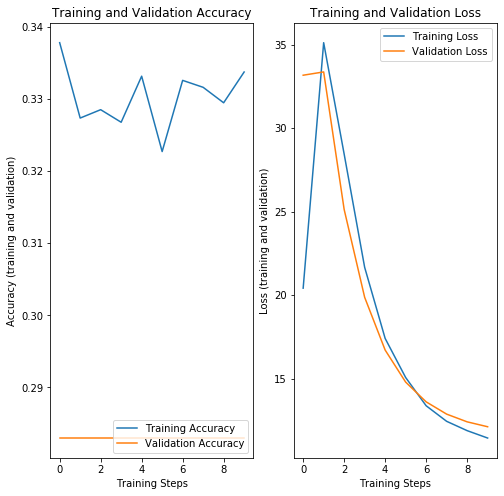

In [ ]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.savefig('/content/drive/My Drive/Colab Notebooks/Citrus_mobilenet/citrus_graph_3.png',dpi=400)
plt.show()

**using** **regularizer and LR=0.003**

In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
   
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(64, input_dim=64, kernel_regularizer = regularizers.l2(0.01)),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

In [ ]:
LEARNING_RATE = 0.003 #@param {type:"number"}

model.compile(
   optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['acc'])

In [ ]:
EPOCHS=15 #@param {type:"integer"}

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/15
27/27 [==============================] - 141s 5s/step - loss: 0.2093 - acc: 0.9756 - val_loss: 0.9094 - val_acc: 0.8698
Epoch 2/15
27/27 [==============================] - 140s 5s/step - loss: 0.1724 - acc: 0.9820 - val_loss: 0.6249 - val_acc: 0.9123
Epoch 3/15
27/27 [==============================] - 139s 5s/step - loss: 0.1840 - acc: 0.9727 - val_loss: 0.5890 - val_acc: 0.8889
Epoch 4/15
27/27 [==============================] - 138s 5s/step - loss: 0.1668 - acc: 0.9739 - val_loss: 0.5126 - val_acc: 0.9193
Epoch 5/15
27/27 [==============================] - 136s 5s/step - loss: 0.1352 - acc: 0.9820 - val_loss: 0.7689 - val_acc: 0.8776
Epoch 6/15
27/27 [==============================] - 136s 5s/step - loss: 0.1404 - acc: 0.9768 - val_loss: 0.4711 - val_acc: 0.9210
Epoch 7/15
27/27 [==============================] - 135s 5s/step - loss: 0.1167 - acc: 0.9855 - val_loss: 0.5989 - val_acc: 0.9062
Epoch 8/15
27/27 [==============================] - 135s 5s/step - loss: 0.1024 - a

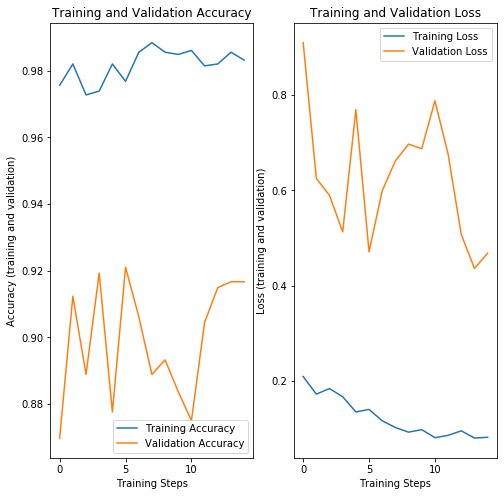

In [ ]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.savefig('/content/drive/My Drive/Colab Notebooks/Citrus_mobilenet/citrus_graph_4.png',dpi=400)
plt.show()

In [ ]:
# Import OpenCV
import os
import cv2
from pathlib import Path
path = Path("__file__").parent
path /= "/content/drive/My Drive/Colab Notebooks/Maize/validation"
for f in path.iterdir():
    print(f)    # <--- type: <class 'pathlib.PosixPath'>
    f = str(f)  # <--- convert to string
    img=cv2.imread(f)


def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    
    return {classes[class_idx]: probabilities[class_idx]}

In [ ]:
import time
t = time.time()

export_path = "/content/drive/My Drive/Colab Notebooks/Maize/saved_models/{}".format(int(t))
tf.keras.experimental.export_saved_model(model, export_path)

export_path

In [ ]:
# Now confirm that we can reload it, and it still gives the same results
reloaded = tf.keras.experimental.load_from_saved_model(export_path, custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
!mkdir "/content/drive/My Drive/Colab Notebooks/Maize/tflite_models"
TFLITE_MODEL = "/content/drive/My Drive/Colab Notebooks/Maize/tflite_models/topoma_model.tflite"


# Get the concrete function from the Keras model.
run_model = tf.function(lambda x : reloaded(x))

# Save the concrete function.
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)

# Convert the model to standard TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(converted_tflite_model)